# <center>Bellabeat Case Study</center><center><span style="font-size:20px;">How to Play it Smart</span></center><div style="border-top: 5px solid #fb937b; margin-top: 1px; margin-bottom: 1px"></div>
This case study is part of the Google Data Analytics course capstone. In this scenario we were asked to focus on a
Bellabeat product and analyze smart device usage data in order to gain insights into how consumers are using their smart devices. Then, using this information, provide recommendations for how these trends can help guide Bellabeat marketing strategy for the company. 

## What is Bellabeat
Bellabeat is a fitness and wellness tech company designed specifically for women that manufactures health-focused smart products. Their devices collect data on activity, sleep, stress, and reproductive health in order to empower women with knowledge about their own health and habits. A few of their devices include:

- **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.


- **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.


- **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

## Business Task
- Gain insights about how consumers are using non Bellabeat smart devices in order to provide recommendations for Bellabeat's own marketing strategy in regards to one of their products.

## The Data
The data for this analysis is the [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius)

This Kaggle data has 18 CSV files containing personal fitness tracker data collected between April 12, 2016 and May 12, 2016 from thirty fitbit users who consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

There is a main data set which includes information about daily activity, steps, heart rate ect. that can be used to explore users’ daily habits. The remaining data sets break down the data by hour, minute, and seconds for each user.

For the purpose of this case study I will be using the following datasets:
- `dailyActivity_merged.csv`
- `sleepDay_merged.csv`
- `hourlySteps_merged.csv`
- `minuteStepsWide_merged.csv`
- `minuteMETsNarrow_merged.csv`
- `dailyCalories_merged.csv`
- `weightLogInfo_merged.csv`


## Data Cleaning and Analysis

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# looking at all the files and their names in the folder
path = '/Users/chinabradley/Dropbox/Portfolio Projects/Bellabeat_Marketing_Analysis/FitabaseData'
count = 0
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(filename)
        count += 1
        
print(count)
        



minuteIntensitiesWide_merged.csv
dailyActivity_merged.csv
sleepDay_merged.csv
heartrate_seconds_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteMETsNarrow_merged.csv
hourlySteps_merged.csv
hourlyIntensities_merged.csv
dailyCalories_merged.csv
hourlyCalories_merged.csv
minuteSleep_merged.csv
minuteCaloriesNarrow_merged.csv
dailySteps_merged.csv
minuteCaloriesWide_merged.csv
minuteStepsNarrow_merged.csv
minuteStepsWide_merged.csv
weightLogInfo_merged.csv
dailyIntensities_merged.csv
18


In [3]:
# reading in relevant files I will be working with
daily_activity = pd.read_csv('FitabaseData/dailyActivity_merged.csv')
sleep = pd.read_csv('FitabaseData/sleepDay_merged.csv')
steps_by_hour = pd.read_csv('FitabaseData/hourlySteps_merged.csv')
steps_by_min = pd.read_csv('FitabaseData/minuteStepsWide_merged.csv')
METs_by_min = pd.read_csv('FitabaseData/minuteMETsNarrow_merged.csv')
calories = pd.read_csv('Fitabasedata/dailyCalories_merged.csv')
weight = pd.read_csv('Fitabasedata/weightLogInfo_merged.csv')

### Daily Activity

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

The majority of the data is either int or float except for `ActivityDate` which will need to be changed to a datetime dtype. Once converted to datetime I will then add a day of week column. I will also be changing the remaining int dtypes except for `Id` and `DayOfWeek` to float.

There is no null or missing data but let's take a look at inactive users.

I will also check for any duplicate data



In [7]:
# changing the ActivityDate to datetime
daily_activity.loc[:,'ActivityDate'] =  pd.to_datetime(daily_activity.loc[:,'ActivityDate'], format='%m/%d/%Y')

# adding a column for day of the week
daily_activity.loc[:,'DayOfWeekNum'] = daily_activity.loc[:,'ActivityDate'].dt.dayofweek

# adding a column for day of week number
daily_activity.loc[:,'DayOfWeek'] = daily_activity.loc[:,'ActivityDate'].dt.day_name()
daily_activity.head()

# adding a column for total active minutes
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']


In [8]:
# changing all numeric types to float
for col in daily_activity.iloc[:,np.r_[2, 10:15]]:
    daily_activity[col] = daily_activity[col].astype('float')

daily_activity.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                         float64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                  float64
FairlyActiveMinutes                float64
LightlyActiveMinutes               float64
SedentaryMinutes                   float64
Calories                           float64
DayOfWeekNum                         int64
DayOfWeek                           object
TotalActiveMinutes                   int64
dtype: object

In [9]:
# checking for duplicates
daily_activity[daily_activity.duplicated(subset=['Id',  'ActivityDate'])]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeekNum,DayOfWeek,TotalActiveMinutes


In [10]:
# checking for missing data, each user should have 31 days of data
daily_activity.groupby('Id').count()['ActivityDate']

Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4057192912     4
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: ActivityDate, dtype: int64

### Looking at Inactivity


In [11]:
# how many 0.0 or non logged instances for each variable
not_logged_count = daily_activity.iloc[:,2:12] == 0.0
not_logged_count.sum(axis=0)

TotalSteps                   77
TotalDistance                78
TrackerDistance              78
LoggedActivitiesDistance    908
VeryActiveDistance          413
ModeratelyActiveDistance    386
LightActiveDistance          85
SedentaryActiveDistance     858
VeryActiveMinutes           409
FairlyActiveMinutes         384
dtype: int64

In [12]:
# number or SedentaryActiveDistance greater than zero
print('SedentaryActiveDistance greater than 0:', daily_activity[daily_activity.SedentaryActiveDistance > 0].shape[0])
print('SedentaryActiveDistance greater than .10:', daily_activity[daily_activity.SedentaryActiveDistance >= .101].shape[0])
print('SedentaryActiveDistance greater than .11:', daily_activity[daily_activity.SedentaryActiveDistance >= .11].shape[0])

SedentaryActiveDistance greater than 0: 82
SedentaryActiveDistance greater than .10: 1
SedentaryActiveDistance greater than .11: 0


Both `LoggedActivitiesDistance` and `SedentaryActiveDistance` contain a large amount of zero data. For LoggedActivitesDistance this shows that there are very few instances of users manually logging activity data and are instead relying on the watch to detect activities. The only reason to manually log activity data would be because you were not wearing the watch during activity or the watch incorrectly logged activity data. Having so few manually logged activities should be the goal. It would show that the watch is doing its job and the users are wearing it.

`SedentaryActiveDistance` should have a large amount of zero data since if you are sedentary you are not moving. Since all SedentaryActiveDistance is less than .11 distance, I am going to assume this is the watch reading the slight movements we make when we are not moving. Again, you would want these numbers to be low. If these numbers were high, there may be something wrong with the watch or a user may be manipulating data.

Let's take a closer look at how many users are manually logging activity data.


In [13]:
# users who are manually logging data
print(daily_activity[daily_activity.LoggedActivitiesDistance > 0].groupby('Id').count()['LoggedActivitiesDistance'])

# percent of those users manually logging data
print(f"Percent of users manually logging data: {round((4) / (daily_activity.Id.value_counts().count()) * 100)}%")

Id
6775888955     1
6962181067     3
7007744171    12
8378563200    16
Name: LoggedActivitiesDistance, dtype: int64
Percent of users manually logging data: 12%


There are four users total (12% of users) who are manually logging activity data. Of those four, two users are consistently logging data. This may be because the watch is not compatible with the activity being performed. 

In [14]:
# creating a data frame containing all inactive days for each user
no_activity = daily_activity.loc[(daily_activity.iloc[:, 2:13] == 0.0).all(axis=1), :]
no_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeekNum,DayOfWeek,TotalActiveMinutes
30,1503960366,2016-05-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,0.0,3,Thursday,0
104,1844505072,2016-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1347.0,6,Sunday,0
105,1844505072,2016-04-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1347.0,0,Monday,0
106,1844505072,2016-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1347.0,1,Tuesday,0
112,1844505072,2016-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1348.0,0,Monday,0


In [15]:
# percent of data that is inactive
print(f"{round(len(no_activity) / len(daily_activity) * 100, 2)}% of the data is inactive")

8.09% of the data is inactive


In [16]:
# percent of data that is inactive and missing
missing_data = (33*31) - daily_activity.groupby('Id').count()['ActivityDate'].sum()
print(f"{round((len(no_activity) + missing_data) / len(daily_activity) * 100, 2)}% of the data is inactive or missing")

16.91% of the data is inactive or missing


In [17]:
# number of inactive days each user has had
print(no_activity.value_counts('Id'))

# percent of inactive days over the course of the month
print(f"Percent of inactivity over the month: {round((no_activity.value_counts('Id').sum()) / (daily_activity.groupby('Id').count()['ActivityDate'].sum()) * 100)}%")

Id
1927972279    14
4020332650    14
1844505072    10
8792009665    10
6775888955     9
6117666160     5
6290855005     4
5577150313     2
7007744171     2
1503960366     1
4057192912     1
4702921684     1
7086361926     1
8253242879     1
8583815059     1
dtype: int64
Percent of inactivity over the month: 8%


15 of 33 users included in this dataset had at least one inactive day during this 31 day time span. That is 8% of the total days.

Tuesday      14
Thursday     14
Wednesday    11
Sunday       11
Monday       10
Saturday     10
Friday        6
Name: DayOfWeek, dtype: int64


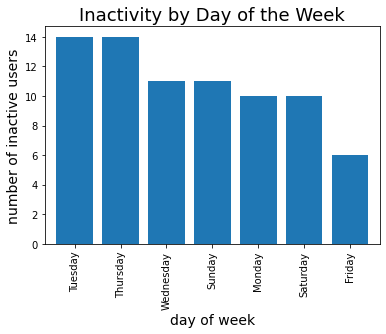

In [18]:
# day of week with most inactive days
print(no_activity.DayOfWeek.value_counts())

# visualizing inactivity by day of the week
fig, ax = plt.subplots(figsize=(6, 4))

no_activity.DayOfWeek.value_counts().plot(
    x = 'Id',
    kind = 'bar',
    width=0.8,
    ax=ax)

plt.xlabel('day of week', size=14)
plt.ylabel('number of inactive users', size=14)
plt.title('Inactivity by Day of the Week', size=18)
plt.show()

the most inactive days of the week appear to be the middle of the week with Tuesday, Wednesday, and Thursday. The least inactive days of the week appear to be the beginning and end of the week with Monday, Friday, and Saturday.

### Limitations from the data
Each user should have 31 days of data. Unfortunately, the data provided has missing data for 12 users. Each of those 12 users had less than 31 days of data. This could be inactive days or it could be some kind of error. As there is no indication from the data source why there are missing days for some users, I will be using the data as is.

### Looking at Daily Activity trends

In [19]:
# creating a df with active days by removing the inactive days from above
active = daily_activity.loc[~(daily_activity.iloc[:, 2:13] == 0.0).all(axis=1), :]
active

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeekNum,DayOfWeek,TotalActiveMinutes
0,1503960366,2016-04-12,13162.0,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25.0,13.0,328.0,728.0,1985.0,1,Tuesday,366
1,1503960366,2016-04-13,10735.0,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21.0,19.0,217.0,776.0,1797.0,2,Wednesday,257
2,1503960366,2016-04-14,10460.0,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30.0,11.0,181.0,1218.0,1776.0,3,Thursday,222
3,1503960366,2016-04-15,9762.0,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29.0,34.0,209.0,726.0,1745.0,4,Friday,272
4,1503960366,2016-04-16,12669.0,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36.0,10.0,221.0,773.0,1863.0,5,Saturday,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686.0,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17.0,4.0,245.0,1174.0,2847.0,6,Sunday,266
936,8877689391,2016-05-09,20226.0,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73.0,19.0,217.0,1131.0,3710.0,0,Monday,309
937,8877689391,2016-05-10,10733.0,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18.0,11.0,224.0,1187.0,2832.0,1,Tuesday,253
938,8877689391,2016-05-11,21420.0,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88.0,12.0,213.0,1127.0,3832.0,2,Wednesday,313


<AxesSubplot:>

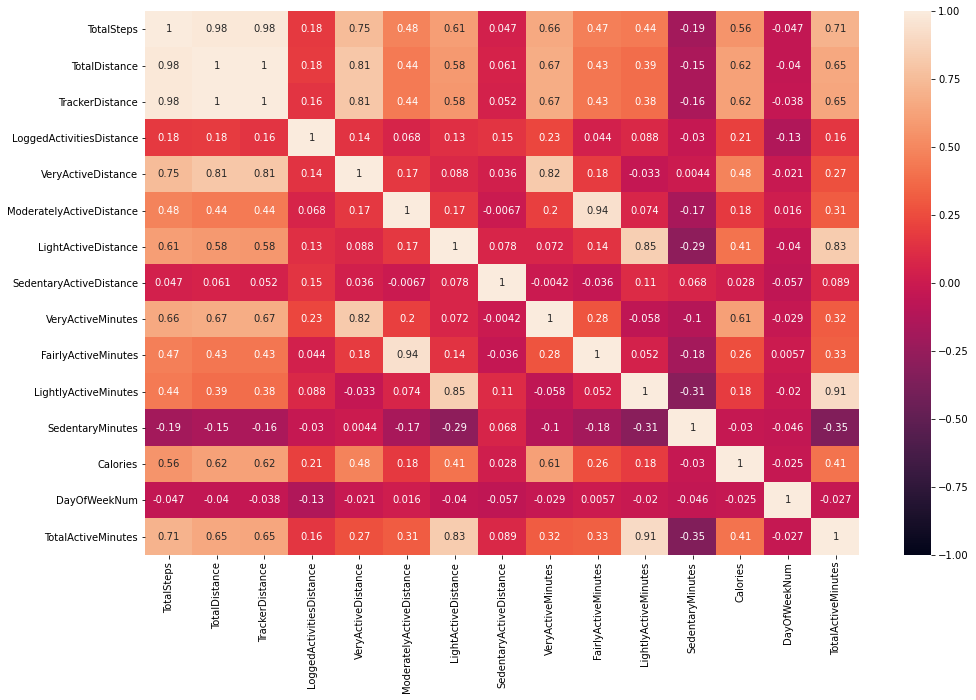

In [20]:
# looking at correlations
plt.figure(figsize=(16, 10))
sns.heatmap(active.iloc[:,2:].corr(), vmin=-1, vmax=1, annot=True)

Besides the obvious positive correlations between `TotalSteps` and `TotalDistance`, there is a positive correlation between `TotalSteps` and `VeryActiveDistance` / `VeryActiveMinutes`. 

There is also a very slight positive correlation between `Calories` and `TotalDistance` / `VeryActiveMinutes`. 

These findings could be useful for helping your users achieve their goals.

### Sedentary Minutes
According to studies, being sedentary for a prolonged amount of time can have adverse affects on your health. In particular, time spent sedentary is a risk factor for diabetes, obesity, and cardiovascular disease. 

The following article [Too much sitting – A health hazard](https://www.diabetesresearchclinicalpractice.com/article/S0168-8227(12)00208-2/fulltext) even states that
>the associations of sedentary behavior with these adverse outcomes have been shown to persist even when participation in leisure-time moderate-to-vigorous physical activity had been accounted for.

That means that the effects of sedentary behavior are difficult to offset, even with exercise. The best way to negate sedentary behavior is to break up long periods of sitting as often as possible.

Lastly, according to this article [Yes, sitting too long can kill you, even if you exercise](https://www.cnn.com/2017/09/11/health/sitting-increases-risk-of-death-study/index.html), there is no threshold where the risk for death is increased, but the risk of death increased with more sitting.

>those who sat for more than 13 hours per day had a 2-fold (or 200%) greater risk of death compared to those who sat for less than about 11 hours per day.

Something Fitbit does to help their users break up long periods of sedentary behavior is to send reminders to their devices if they have not met a move goal for that hour. Fitbit has a default movement goal of 250 steps.

Let's take a look at the fitbit data to see how long users were spending sedentary. Then let's take a look at if movement reminders are helping users meet hourly movement goals.

In [21]:
# how many hours a day are active users Sedentary
time_sed = round(active.SedentaryMinutes.mean(), 2)
hours = int(time_sed/60)
minutes = (time_sed) % 60

print("The average amount of time per day users were sedentary was %d:%02d" % (hours, minutes))

The average amount of time per day users were sedentary was 15:56


In [22]:
# how many hours a day are users active
time_active = round(active.TotalActiveMinutes.mean(), 2)
hours = int(time_active/60)
minutes = (time_active) % 60

print("The average amount of time per day users were active was %d:%02d" % (hours, minutes))

The average amount of time per day users were active was 4:07


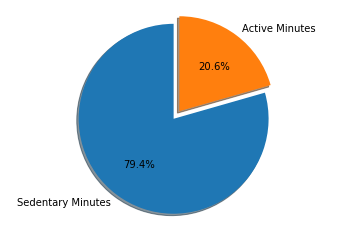

In [23]:
# visualizing active minutes vs sedentary minutes
labels = 'Sedentary Minutes', 'Active Minutes'
sizes = [time_sed, time_active]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The data shows that on average users were sedentary for 15 hours or almost 80% of their day. As a fitness and wellness brand and based on the studies above that list the negative impacts being sedentary has on ones health, this is something Bellabeat should look to combat. 

Lets take see if movement reminders are working to help users reach 250 steps an hour movement goal.

In [24]:
steps_by_min.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# removing 'Steps' from column names
steps_by_min.columns = steps_by_min.columns.str.replace('Steps', '')

# changing ActivityHour to date time dtype
# seperating out the time into a seperate column
# changing id to object dtype
steps_by_min['Date'] = pd.to_datetime(steps_by_min['ActivityHour']).dt.date
steps_by_min['Hour'] = pd.to_datetime(steps_by_min['ActivityHour']).dt.strftime('%H:%M:%S %p')
steps_by_min.drop('ActivityHour', axis=1, inplace=True)
steps_by_min['Id'] = steps_by_hour['Id'].astype('object')
  
# shift column to front after ID
moved_column1 = steps_by_min.pop('Date')
moved_column2 = steps_by_min.pop('Hour')
  
# insert column using insert(position,column_name,
# first_column) function
steps_by_min.insert(1, 'Date', moved_column1)
steps_by_min.insert(2, 'Hour', moved_column2)



In [26]:
# adding column for last 10 mins, first 50, and total steps
steps_by_min['Last10'] = steps_by_min.iloc[:, -10:].sum(axis=1)
steps_by_min['First50'] = steps_by_min.iloc[:, 3:-11].sum(axis=1)
steps_by_min['TotalSteps'] = steps_by_min.iloc[:, 3:-2].sum(axis=1)
steps_by_min['pct_steps_last10'] = round(steps_by_min.Last10 / steps_by_min.TotalSteps * 100)
  
# removing data where total steps equal 0
steps_by_min = steps_by_min[steps_by_min.TotalSteps != 0]
steps_by_min.head()

,Id,Date,Hour,00,01,02,03,04,05,06,...,54,55,56,57,58,59,Last10,First50,TotalSteps,pct_steps_last10
0,1503960366,2016-04-13,00:00:00 AM,4,16,0,0,0,9,0,...,20,1,0,0,0,0,38,106,144,26.0
3,1503960366,2016-04-13,03:00:00 AM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,36,0.0
7,1503960366,2016-04-13,07:00:00 AM,0,0,0,0,0,0,0,...,0,0,0,0,0,16,45,81,126,36.0
8,1503960366,2016-04-13,08:00:00 AM,0,0,0,0,0,0,0,...,0,0,31,0,42,2,96,179,275,35.0
9,1503960366,2016-04-13,09:00:00 AM,0,14,10,31,37,17,25,...,0,0,0,0,0,105,113,1566,1679,7.0


In [27]:
# filtering data to be between 6am - 10pm
steps_by_min['Hour'] = pd.to_datetime(steps_by_min['Hour'], format='%H:%M:%S %p').dt.hour
steps_by_min = steps_by_min[(steps_by_min.Hour > 6) & (steps_by_min.Hour < 11)]

In [28]:
# step percentage broken down in 10 minute chunks
# pulling out users who did not reach the movement goal by the last 10 minutes
steps_by_min = steps_by_min[steps_by_min.First50 < 250]

print(f"{round(steps_by_min.iloc[:, 3:13].sum(axis=1).sum() / steps_by_min.TotalSteps.sum() * 100, 2)}% of steps are compleated in the 1st 10 minutes")
print(f"{round(steps_by_min.iloc[:, 13:23].sum(axis=1).sum() / steps_by_min.TotalSteps.sum() * 100, 2)}% of steps are compleated between minutes 10-19")
print(f"{round(steps_by_min.iloc[:, 23:33].sum(axis=1).sum() / steps_by_min.TotalSteps.sum() * 100, 2)}% of steps are compleated between minutes 20-29")
print(f"{round(steps_by_min.iloc[:, 33:43].sum(axis=1).sum() / steps_by_min.TotalSteps.sum() * 100, 2)}% of steps are compleated between minutes 30-39")
print(f"{round(steps_by_min.iloc[:, 43:53].sum(axis=1).sum() / steps_by_min.TotalSteps.sum() * 100, 2)}% of steps are compleated between minutes 40-49")
print(f"{round(steps_by_min.iloc[:, 53:63].sum(axis=1).sum() / steps_by_min.TotalSteps.sum() * 100, 2)}% of steps are compleated in the last 10 minutes")

12.94% of steps are compleated in the 1st 10 minutes
10.33% of steps are compleated between minutes 10-19
11.52% of steps are compleated between minutes 20-29
13.07% of steps are compleated between minutes 30-39
15.51% of steps are compleated between minutes 40-49
36.63% of steps are compleated in the last 10 minutes


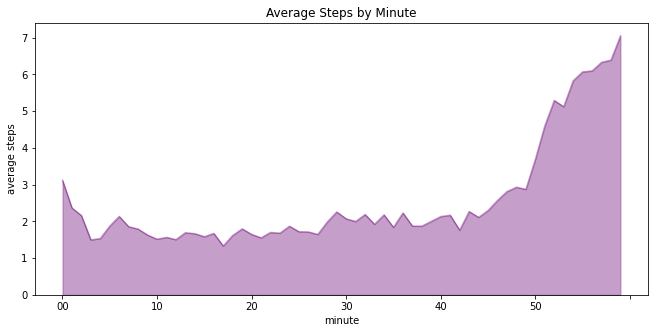

In [29]:
# visualizing steps by minute
df = steps_by_min.iloc[:, 3:-4]
df['First50'] = df.iloc[:,:-11].sum(axis=1)
df['TotalSteps'] = df.iloc[:, :-1].sum(axis=1)
df = df[df.First50 < 250]

fig, ax = plt.subplots(figsize=(11, 5))
(df.iloc[:,:-2].sum()/len(df)).plot(kind='area', color='#700E7A', alpha = .4)
plt.title('Average Steps by Minute')
plt.ylabel('average steps')
plt.xlabel('minute')
plt.show()

In [30]:
# percentage of users who reached the hourly movement goal after reciving the 10 min reminder
print(f"{round(len(df[df.TotalSteps > 250]) / len(df) * 100)}% of users reached the movement goal after receiving the 10 minute reminder")

17% of users reached the movement goal after receiving the 10 minute reminder


Of those who did not reach the movement goal before the reminder was sent, they completed 36% of their steps in the last 10 minutes of the hour. It appears movement reminders work, but only 17% of users are completing the movement goal after they receive a reminder. As illustrated in the graph above, there is a spike in steps at the beginning and end of the hour. Bellabeat might want to consider adding an additional reminder for movement at the half hour mark.

### Active Minutes
According to Fitbit's [FAQ](https://help.fitbit.com/articles/en_US/Help_article/1379.htm) page you earn active minutes through 10 minutes or more of continuous moderate-to-intense activity.

Fitbit devices calculate active minutes through metabolic equivalents (METs). This metric, which factors in your body mass, is used to estimate exercise intensity.

1 MET is the rate of energy you expend during rest or sitting quietly, while you typically expend 3 METs or more during a moderately-intense activity such as walking. You earn active minutes for activities at or above about 3 METs.

If your Fitbit device tracks heart rate, your heart-rate data is used to calculate active minutes for non-step-based activities, such as weight lifting, yoga, and rowing. If your device doesn’t track heart rate, your active minutes for these activities will be lower.

Let's look at how users are gaining active minutes.

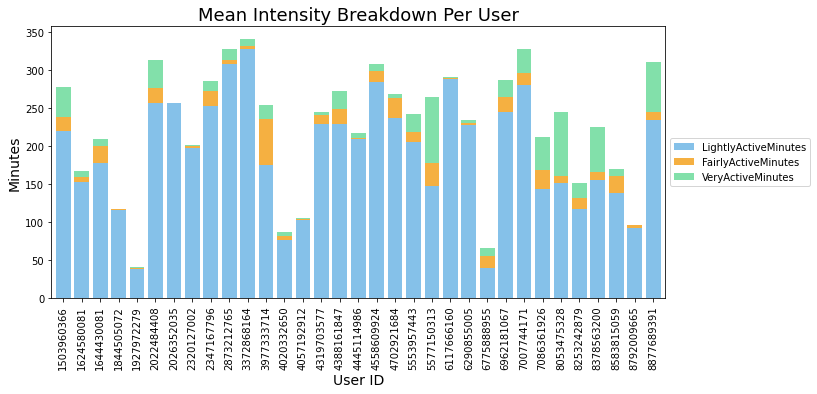

In [31]:
# how are users exersizing 

active_minutes = daily_activity.groupby('Id').mean().reset_index()[['Id','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes' ]]


fig, ax = plt.subplots(figsize=(11, 5))

active_minutes.plot(
    x = 'Id',
    kind = 'bar',
    stacked = True, 
    color=['#85C1E9','#F5B041','#82E0AA'],
    width=0.8,
    ax=ax)

plt.xlabel('User ID', size=14)
plt.ylabel('Minutes', size=14)
plt.title('Mean Intensity Breakdown Per User', size=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


All users spent the majority of their active minutes under light activity. 

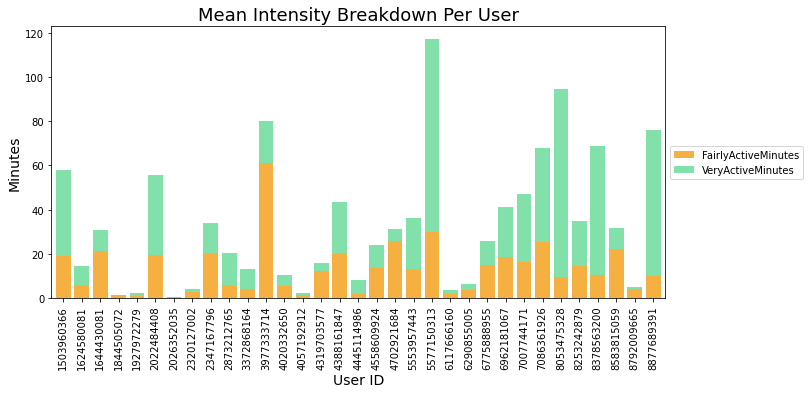

In [32]:
# looking at just FairlyActiveMinutes and VeryActiveMinutes which would be consistant with a more active workout
high_intensity_active_minutes = daily_activity.groupby('Id').mean().reset_index()[['Id','FairlyActiveMinutes','VeryActiveMinutes' ]]


fig, ax = plt.subplots(figsize=(11, 5))

high_intensity_active_minutes.plot(
    x = 'Id',
    kind = 'bar',
    stacked = True, 
    color=['#F5B041','#82E0AA'],
    width=0.8,
    ax=ax)

plt.xlabel('User ID', size=14)
plt.ylabel('Minutes', size=14)
plt.title('Mean Intensity Breakdown Per User', size=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The above graph looks at only `FairlyActiveMinutes` and `VeryActiveMinutes` which are more on par with a workout and greater MET score

In [33]:
# adding columns for workout minutes and distance
active = active.copy()

active.loc[:,'WorkoutMinutes'] = active.loc[:,'FairlyActiveMinutes'] + active.loc[:,'VeryActiveMinutes']
active.loc[:,'WorkoutDistance'] = active.loc[:,'ModeratelyActiveDistance'] + active.loc[:,'VeryActiveDistance']
active

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeekNum,DayOfWeek,TotalActiveMinutes,WorkoutMinutes,WorkoutDistance
0,1503960366,2016-04-12,13162.0,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25.0,13.0,328.0,728.0,1985.0,1,Tuesday,366,38.0,2.43
1,1503960366,2016-04-13,10735.0,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21.0,19.0,217.0,776.0,1797.0,2,Wednesday,257,40.0,2.26
2,1503960366,2016-04-14,10460.0,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30.0,11.0,181.0,1218.0,1776.0,3,Thursday,222,41.0,2.84
3,1503960366,2016-04-15,9762.0,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29.0,34.0,209.0,726.0,1745.0,4,Friday,272,63.0,3.40
4,1503960366,2016-04-16,12669.0,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36.0,10.0,221.0,773.0,1863.0,5,Saturday,267,46.0,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686.0,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17.0,4.0,245.0,1174.0,2847.0,6,Sunday,266,21.0,1.28
936,8877689391,2016-05-09,20226.0,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73.0,19.0,217.0,1131.0,3710.0,0,Monday,309,92.0,11.90
937,8877689391,2016-05-10,10733.0,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18.0,11.0,224.0,1187.0,2832.0,1,Tuesday,253,29.0,1.81
938,8877689391,2016-05-11,21420.0,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88.0,12.0,213.0,1127.0,3832.0,2,Wednesday,313,100.0,13.63


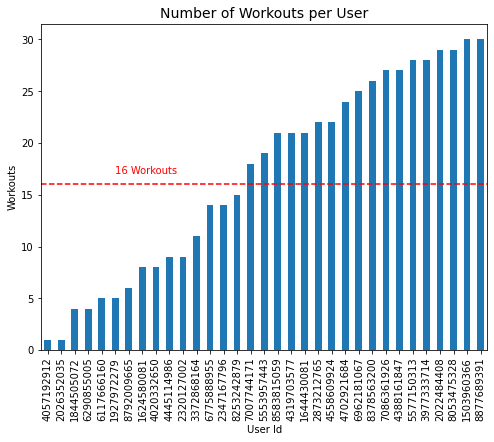

In [34]:
# finding how many workouts each user did over the 30 days that was 5 mins or longer
num_of_workouts = active[active['WorkoutMinutes']>4].groupby('Id').count().WorkoutMinutes
fig,ax = plt.subplots(figsize=(8,6))
num_of_workouts.sort_values().plot(kind='bar')
plt.axhline(16, color='r', linestyle='--')
plt.title('Number of Workouts per User', size=14)
plt.xlabel('User Id')
plt.ylabel('Workouts')
ax.text(5, 17,'16 Workouts', color='red')
plt.show()


In [35]:
# finding how many useres worked out each day
active.groupby('ActivityDate').count()['WorkoutMinutes']

ActivityDate
2016-04-12    31
2016-04-13    31
2016-04-14    31
2016-04-15    33
2016-04-16    31
2016-04-17    29
2016-04-18    31
2016-04-19    28
2016-04-20    30
2016-04-21    28
2016-04-22    31
2016-04-23    30
2016-04-24    30
2016-04-25    28
2016-04-26    29
2016-04-27    29
2016-04-28    31
2016-04-29    28
2016-04-30    28
2016-05-01    28
2016-05-02    27
2016-05-03    28
2016-05-04    27
2016-05-05    26
2016-05-06    28
2016-05-07    25
2016-05-08    23
2016-05-09    24
2016-05-10    22
2016-05-11    22
2016-05-12    17
Name: WorkoutMinutes, dtype: int64

Users are starting strong at the beginning of the 30 days, but the number of users who worked out dropped significantly in the final week. 

This may be because the participants were paid for their participation in this study. At the beginning of the study some users may have been motivated to be active and earn money, altering their typical active behavior. As the study went on, users may have become burnt out from over exerting their typical behavior and lost motivation. 

In [36]:
# number of workouts over 2hrs
active[active['WorkoutMinutes']>120].Id.value_counts()


5577150313    13
8053475328     9
8378563200     7
8877689391     5
3977333714     4
4388161847     2
7086361926     1
4702921684     1
1624580081     1
2347167796     1
2022484408     1
6775888955     1
Name: Id, dtype: int64

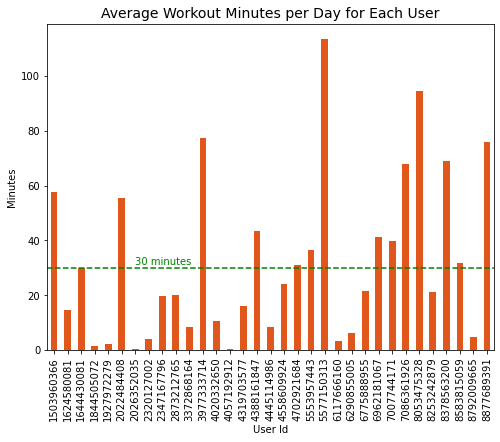

In [37]:
# daily average workout minutes per user
month_average = active.groupby(['Id']).sum()/(31)

fig,ax = plt.subplots(figsize=(8,6))
month_average.WorkoutMinutes.plot(kind='bar', color='#E1571B')
plt.axhline(30, color='g', linestyle='--')
plt.title('Average Workout Minutes per Day for Each User', size=14)
plt.xlabel('User Id')
plt.ylabel('Minutes')
ax.text(6, 31,'30 minutes', color='g')
plt.show()

In [38]:
# how many workouts per week for each user
active['WeekNumber'] = active['ActivityDate'].dt.isocalendar().week
workouts_per_week = active[active['WorkoutMinutes']>4].groupby(['WeekNumber', 'Id']).count().WorkoutMinutes.reset_index().sort_values(['Id','WeekNumber'])

workouts_per_week.rename(columns={"WorkoutMinutes": "Workouts"}, inplace=True)
workouts_per_week

,WeekNumber,Id,Workouts
0,15,1503960366,6
31,16,1503960366,7
61,17,1503960366,7
91,18,1503960366,7
115,19,1503960366,3
...,...,...,...
30,15,8877689391,6
60,16,8877689391,7
90,17,8877689391,7
114,18,8877689391,6


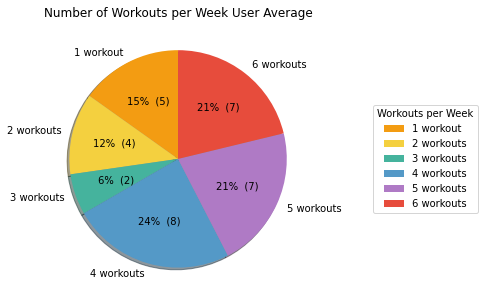

In [39]:
# visualizing the number of workouts per week users are averaging
weekley_average = workouts_per_week.groupby('Id').mean().Workouts.round(0).reset_index()

weekley_average['Workouts'] = weekley_average['Workouts'].astype(int) 
weekley_average = weekley_average.groupby('Workouts').count()
count = weekley_average.Id


labels = ['1 workout', '2 workouts', '3 workouts', '4 workouts', '5 workouts', '6 workouts']
def make_autopct(labels):
    def my_autopct(pct):
        total = sum(count)
        val = int(round(pct*total/100.0))
        return '{p:1.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(weekley_average.Id, labels=labels, startangle=90, autopct=make_autopct(labels),
        shadow=True, colors=['#F39C12', '#F4D03F', '#45B39D', '#5499C7', '#AF7AC5', '#E74C3C'])
#ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(title='Workouts per Week',
           loc ="center left",
           bbox_to_anchor =(1.2, 0, .5, 1))
ax1.set_title('Number of Workouts per Week User Average')

plt.show()

#autopct='%1.1f%%', 





The data above shows that users are wearing their watches to track workouts. On average 66% of users are working out between 4-6 days a week, with about half of the users working out at least 30 minutes a day. A workout friendly watch may be important to its users.

### Looking at MET data

In [40]:
METs_by_min.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [41]:
METs_by_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [42]:
# converting ActivityMinute to datetime and adding Date and Day_Of_Week columns
METs_by_min['ActivityMinute'] = pd.to_datetime(METs_by_min['ActivityMinute'], format='%m/%d/%Y %H:%M:%S %p')
METs_by_min['Date'] = METs_by_min.ActivityMinute.dt.date
METs_by_min['Day_Of_Week'] = METs_by_min.ActivityMinute.dt.day_name()

# converting Id to object dtype
METs_by_min['Id'] = METs_by_min.Id.astype('object')

METs_by_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1325580 non-null  object        
 1   ActivityMinute  1325580 non-null  datetime64[ns]
 2   METs            1325580 non-null  int64         
 3   Date            1325580 non-null  object        
 4   Day_Of_Week     1325580 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 50.6+ MB


<AxesSubplot:xlabel='Id'>

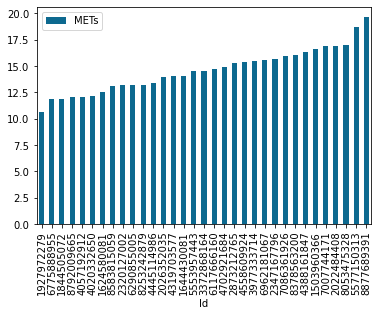

In [43]:
# daily mean MET score for each user
METs_by_min.groupby('Id').mean().sort_values('METs').plot(kind='bar', color='#0D698F')

In [44]:
# finding the average MET Score per Day of Week
METs_by_min.groupby('Day_Of_Week').mean().round(2).sort_values('METs')

,METs
Day_Of_Week,
Sunday,14.22
Wednesday,14.61
Monday,14.66
Thursday,14.67
Friday,14.73
Tuesday,14.88
Saturday,15.03


Users on average have similar MET scores throughout the week, with Saturday having the highest average MET score and Sunday having the lowest average MET score.

## Looking at Steps by Hour

In [45]:
steps_by_hour.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [46]:
# changing ActivityHour to date time dtype
# seperating out the time into a seperate column
# changing id to object dtype
steps_by_hour['Date'] = pd.to_datetime(steps_by_hour['ActivityHour']).dt.date
steps_by_hour['Time'] = pd.to_datetime(steps_by_hour['ActivityHour']).dt.strftime('%H:%M:%S %p')
steps_by_hour['Day_of_Week'] = pd.to_datetime(steps_by_hour['ActivityHour']).dt.day_name()
steps_by_hour.drop('ActivityHour', axis=1, inplace=True)

steps_by_hour['Id'] = steps_by_hour['Id'].astype('object')

steps_by_hour.head()

,Id,StepTotal,Date,Time,Day_of_Week
0,1503960366,373,2016-04-12,00:00:00 AM,Tuesday
1,1503960366,160,2016-04-12,01:00:00 AM,Tuesday
2,1503960366,151,2016-04-12,02:00:00 AM,Tuesday
3,1503960366,0,2016-04-12,03:00:00 AM,Tuesday
4,1503960366,0,2016-04-12,04:00:00 AM,Tuesday


In [47]:
# average number of steps by time of day
weekday = steps_by_hour.loc[~(steps_by_hour.Day_of_Week=='Saturday') & ~(steps_by_hour.Day_of_Week=='Sunday'),:]
weekday_average = weekday.groupby(['Day_of_Week', 'Time']).mean().reset_index()
weekday_average = weekday_average.groupby('Time').mean()
weekday_average

,StepTotal
Time,
00:00:00 AM,33.027403
01:00:00 AM,18.599876
02:00:00 AM,11.957386
03:00:00 AM,6.403208
04:00:00 AM,14.535805
05:00:00 AM,53.844190
06:00:00 AM,218.762841
07:00:00 AM,351.541227
08:00:00 AM,451.707948


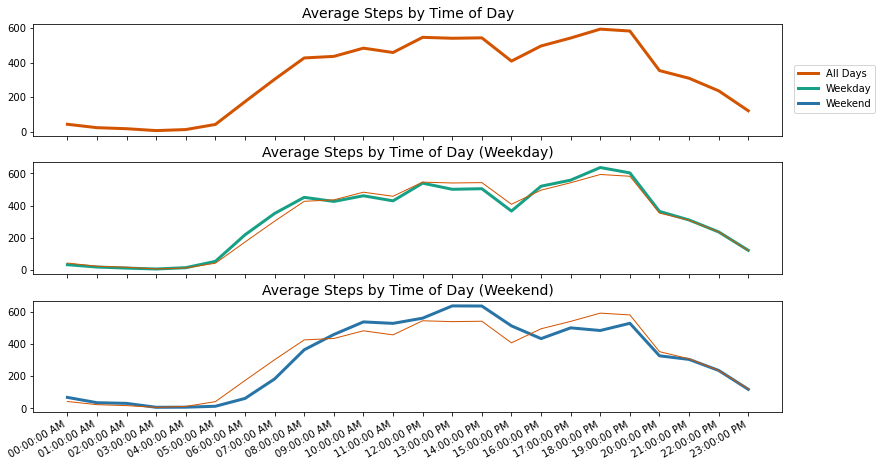

In [48]:
# average steps by time of day
# seperating out the data by all, weekend, and weekday averages
step_average = steps_by_hour.groupby(['Day_of_Week', 'Time']).mean().reset_index()
step_average = step_average.groupby('Time').mean()

weekend = steps_by_hour.loc[(steps_by_hour.Day_of_Week=='Saturday') | (steps_by_hour.Day_of_Week=='Sunday'),:]
weekend_average = weekend.groupby(['Day_of_Week', 'Time']).mean().reset_index()
weekend_average = weekend_average.groupby('Time').mean()

weekday = steps_by_hour.loc[~(steps_by_hour.Day_of_Week=='Saturday') & ~(steps_by_hour.Day_of_Week=='Sunday'),:]
weekday_average = weekday.groupby(['Day_of_Week', 'Time']).mean().reset_index()
weekday_average = weekday_average.groupby('Time').mean()

# set up the axes for plotting
fig, ax = plt.subplots(3,1, figsize=(11,7))
fig.subplots_adjust(hspace=10)
fig.tight_layout()

ax[0].plot(step_average.StepTotal, linewidth=3, color='#D35400', label='All Days')
ax[0].set_title('Average Steps by Time of Day', size=14)

ax[1].plot(weekday_average.StepTotal, linewidth=3, color='#16A085', label='Weekday')
ax[1].set_title('Average Steps by Time of Day (Weekday)', size=14)
ax[1].plot(step_average.StepTotal, linewidth=1, color='#D35400', label='_Hidden')


ax[2].plot(weekend_average.StepTotal, linewidth=3, color='#2874A6', label='Weekend')
ax[2].set_title('Average Steps by Time of Day (Weekend)', size=14)
ax[2].plot(step_average.StepTotal, linewidth=1, color='#D35400', label='_Hidden')

fig.legend(bbox_to_anchor=(1.1, .9), loc='upper right')
fig.autofmt_xdate()
plt.show()

User step activity spikes in the early morning and late afternoon during the weekday, and during the early afternoon during the weekend. There is a significant step decrease in the evening during the weekend.

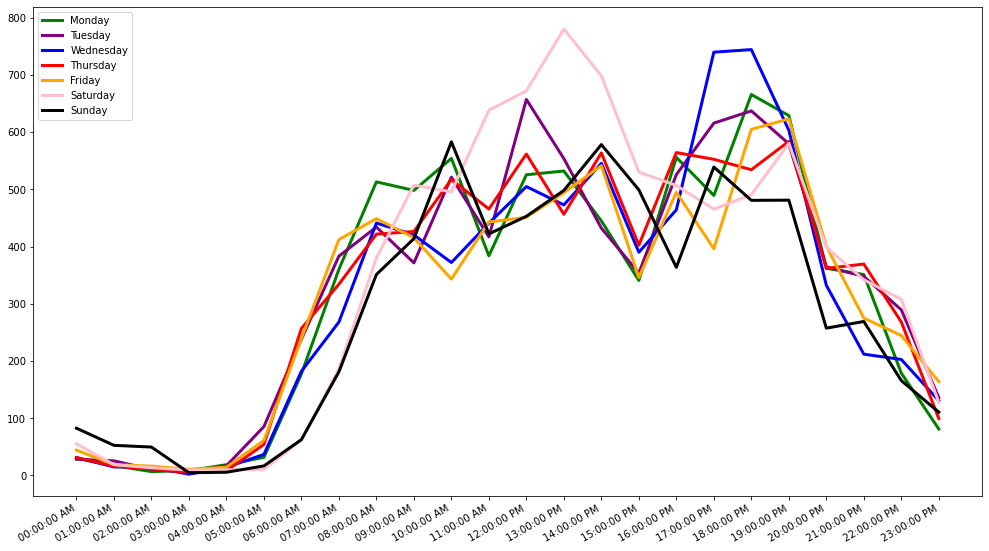

In [49]:
# visualizing average step totals by hour broken down for each day
graph = steps_by_hour.groupby(['Day_of_Week', 'Time']).mean().reset_index()

monday = graph[graph.Day_of_Week == 'Monday']
monday.set_index('Time',inplace=True)
tuesday = graph[graph.Day_of_Week == 'Tuesday']
tuesday.set_index('Time', inplace=True)
wednesday = graph[graph.Day_of_Week == 'Wednesday']
wednesday.set_index('Time', inplace=True)
thursday = graph[graph.Day_of_Week == 'Thursday']
thursday.set_index('Time', inplace=True)
friday = graph[graph.Day_of_Week == 'Friday']
friday.set_index('Time', inplace=True)
saturday = graph[graph.Day_of_Week == 'Saturday']
saturday.set_index('Time', inplace=True)
sunday = graph[graph.Day_of_Week == 'Sunday']
sunday.set_index('Time', inplace=True)

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(monday.StepTotal, color = 'green', label = 'Monday', linewidth=3)
ax.plot(tuesday.StepTotal, color = 'Purple', label = 'Tuesday', linewidth=3)
ax.plot(wednesday.StepTotal, color = 'blue', label = 'Wednesday', linewidth=3)
ax.plot(thursday.StepTotal, color = 'red', label = 'Thursday', linewidth=3)
ax.plot(friday.StepTotal, color = 'orange', label = 'Friday', linewidth=3)
ax.plot(saturday.StepTotal, color = 'pink', label = 'Saturday', linewidth=3)
ax.plot(sunday.StepTotal, color = 'black', label = 'Sunday', linewidth=3)

ax.legend(loc = 'upper left')
fig.autofmt_xdate()
plt.show()

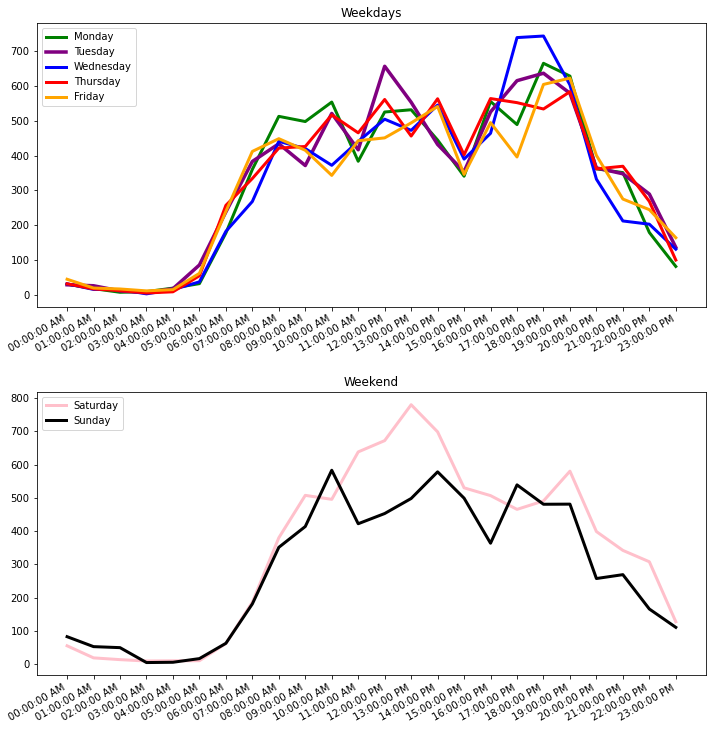

In [50]:
fig, ax = plt.subplots(2, figsize=(12,12))

ax[0].plot(monday.StepTotal, color = 'green', label = 'Monday', linewidth=3)
ax[0].plot(tuesday.StepTotal, color = 'Purple', label = 'Tuesday', linewidth=3.5)
ax[0].plot(wednesday.StepTotal, color = 'blue', label = 'Wednesday', linewidth=3)
ax[0].plot(thursday.StepTotal, color = 'red', label = 'Thursday', linewidth=3)
ax[0].plot(friday.StepTotal, color = 'orange', label = 'Friday', linewidth=3)
ax[1].plot(saturday.StepTotal, color = 'pink', label = 'Saturday', linewidth=3)
ax[1].plot(sunday.StepTotal, color = 'black', label = 'Sunday', linewidth=3)

# add legend and title
ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')
ax[0].set_title('Weekdays')
ax[1].set_title('Weekend')

# get xtick labels on both subplots
plt.setp(ax[0].get_xticklabels(), rotation=30, ha='right')
plt.setp(ax[1].get_xticklabels(), rotation=30, ha='right')

# add space between plots
fig.subplots_adjust(hspace=.3)

plt.show()

### Calories and Sleep

In [51]:
# seeing if there is duplicated data
sleep[sleep.duplicated(subset=['Id', 'SleepDay'], keep=False)]


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,5/5/2016 12:00:00 AM,1,471,495
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
222,4702921684,5/7/2016 12:00:00 AM,1,520,543
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
379,8378563200,4/25/2016 12:00:00 AM,1,388,402
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [52]:
# seeing if there is duplicated data
calories[calories.duplicated(subset=['Id', 'ActivityDay'], keep=False)]

,Id,ActivityDay,Calories


In [53]:
# removing duplicate data
sleep.drop_duplicates(subset=['Id', 'SleepDay'], keep='first', inplace=True)
sleep[sleep.duplicated(subset=['Id', 'SleepDay'], keep=False)]


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [54]:
# converting calories to datetime
calories['ActivityDay'] = pd.to_datetime(calories.ActivityDay, format='%m/%d/%Y')
calories.rename(columns={'ActivityDay':'Date'})
print(calories)

# converting sleep to datetime
sleep['SleepDay'] = pd.to_datetime(sleep.SleepDay, format='%m/%d/%Y %H:%M:%S %p')
sleep['SleepDay'] = sleep.SleepDay.dt.date
#.astype('object')
sleep.rename(columns={'SleepDay':'Date'}, inplace=True)
print(sleep)

             Id ActivityDay  Calories
0    1503960366  2016-04-12      1985
1    1503960366  2016-04-13      1797
2    1503960366  2016-04-14      1776
3    1503960366  2016-04-15      1745
4    1503960366  2016-04-16      1863
..          ...         ...       ...
935  8877689391  2016-05-08      2847
936  8877689391  2016-05-09      3710
937  8877689391  2016-05-10      2832
938  8877689391  2016-05-11      3832
939  8877689391  2016-05-12      1849

[940 rows x 3 columns]
             Id        Date  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  2016-04-12                  1                 327   
1    1503960366  2016-04-13                  2                 384   
2    1503960366  2016-04-15                  1                 412   
3    1503960366  2016-04-16                  2                 340   
4    1503960366  2016-04-17                  1                 700   
..          ...         ...                ...                 ...   
408  8792009665  2016-04-30   

In [55]:
sleep.shape

(410, 5)

In [56]:
sleep.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [57]:
# a look at sleep data there is per user
sleep['Id'].value_counts()

8378563200    31
6962181067    31
5553957443    31
2026352035    28
3977333714    28
4445114986    28
4702921684    27
4319703577    26
5577150313    26
1503960366    25
7086361926    24
4388161847    23
6117666160    18
8792009665    15
2347167796    15
4020332650     8
4558609924     5
1927972279     5
1644430081     4
8053475328     3
6775888955     3
1844505072     3
7007744171     2
2320127002     1
Name: Id, dtype: int64

Only 24 users of 33 have provided sleep data, and only 3 users provided sleep data for every day of the month of data. This may be because users are charging their devices at night or they do not find wearing their device while sleeping comfortable.

In [58]:
calories.head()

,Id,ActivityDay,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863


In [59]:
# join sleep dataset with calories dataset
sleepVcalories = sleep.join(calories, how='left', lsuffix=['Id','Date'])
sleepVcalories.drop('Id', axis=1, inplace=True)
sleepVcalories.rename(columns={"Id['Id', 'Date']":'Id'}, inplace=True)

sleepVcalories.head()


,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDay,Calories
0,1503960366,2016-04-12,1,327,346,2016-04-12,1985
1,1503960366,2016-04-13,2,384,407,2016-04-13,1797
2,1503960366,2016-04-15,1,412,442,2016-04-14,1776
3,1503960366,2016-04-16,2,340,367,2016-04-15,1745
4,1503960366,2016-04-17,1,700,712,2016-04-16,1863


<AxesSubplot:>

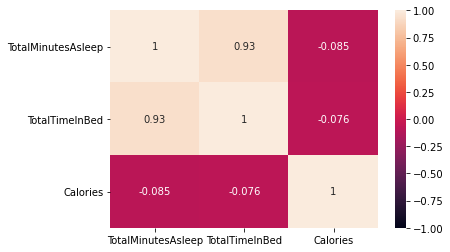

In [60]:
# correlation between sleep and calories
sns.heatmap(sleepVcalories[['TotalMinutesAsleep', 'TotalTimeInBed','Calories']].corr(), vmin=-1, vmax=1, annot=True)


There does not appear to be any significant correlation between sleep and calories.

### Looking at Weight

In [61]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [62]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [63]:
weight.Id.value_counts()

6962181067    30
8877689391    24
4558609924     5
4319703577     2
1503960366     2
2873212765     2
1927972279     1
5577150313     1
Name: Id, dtype: int64

In [64]:
# converting the date column to datetime
weight['Date'] =  pd.to_datetime(weight.Date, format='%m/%d/%Y %H:%M:%S %p')

# seperateing date and time data
weight['Time'] = weight.Date.dt.time
weight['Date'] = weight.Date.dt.date
weight.head()

# dropping Fat column
weight.drop('Fat', axis=1, inplace=True)

weight.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId,Time
0,1503960366,2016-05-02,52.599998,115.963147,22.650000,True,1462233599000,11:59:59
1,1503960366,2016-05-03,52.599998,115.963147,22.650000,True,1462319999000,11:59:59
2,1927972279,2016-04-13,133.500000,294.317120,47.540001,False,1460509732000,01:08:52
3,2873212765,2016-04-21,56.700001,125.002104,21.450001,True,1461283199000,11:59:59
4,2873212765,2016-05-12,57.299999,126.324875,21.690001,True,1463097599000,11:59:59


In [65]:
# looking at number of useres that have provided data
print(weight.Id.value_counts())
print(f"{len(weight.Id.value_counts())} users tracking weight data")

6962181067    30
8877689391    24
4558609924     5
4319703577     2
1503960366     2
2873212765     2
1927972279     1
5577150313     1
Name: Id, dtype: int64
8 users tracking weight data


In [66]:
# how are the top 3 users entering weigh data
top_users = [6962181067, 8877689391, 4558609924]
top_users_df = weight[weight.Id.isin(top_users)]

print(f"{(len(top_users_df[top_users_df.IsManualReport == True].Id.unique()))} users manually entering weight data, {(len(top_users_df[top_users_df.IsManualReport == False].Id.unique()))} user auto entering data")


2 users manually entering weight data, 1 user auto entering data


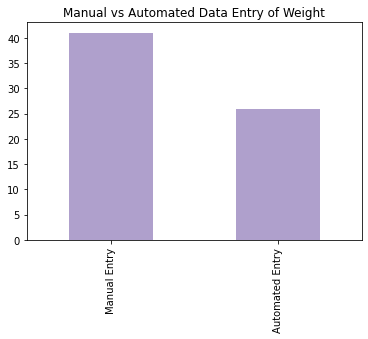

In [67]:
# is data being entered manually?
weight_entry = weight.IsManualReport.value_counts().plot(kind='bar', color='#7B61AB', alpha=.6)
weight_entry.set_title('Manual vs Automated Data Entry of Weight')
weight_entry.set_xticklabels( ('Manual Entry', 'Automated Entry') )
plt.show()

In [68]:
# how many users are manually entering data vs automatic tracking
print(f"{(len(weight[weight.IsManualReport == True].Id.unique()))} users manually entering weight data")

print(f"{len(weight[weight.IsManualReport == False].Id.unique())} users automatically tracking weight data")

5 users manually entering weight data
3 users automatically tracking weight data


Only 8 users provided weight data. Of the 8, only 3 consistently provided weight data at least once a week. The majority of users had to manually input weight data. It appears that since users need to manually enter their weight, they are less likely to provide the data, especially consistently. Those whose weight was entered automatically most likely have a scale at home that syncs with their account.

   # Conclusion and Recommendations  
 <div style="border-top: 5px solid #fb937b; margin-top: 1px; margin-bottom: 1px"></div>
   
   The data above did contain some limitations. First, the users were paid for their participation in the study, which may have altered their behavior. Second, there were only 33 users and 31 days of data. A second analysis with more data should be conducted once more data is obtained. Third, there were 12 users that had less than 31 days of data. Lastly, The Fitbit data did not have information on gender so I was not able to extrapolate any information about Bellabeat's target audience. Gathering data from Bellabeat's existing users would be highly beneficial to gain more accurate insights into female targeted insights.
   
   ## Leaf Marketing Strategy
   
   ### 1. Provide Replacement Battery
   Battery life of the Bellabeat Leaf is 6 months. This is a plus for the brand since this eliminates users having to take off the device to charge every few days. Once a device is taken off for charging, there is no guarantee the user will put it back on. With 17% of the data inactive or missing you want to limit the number of times a user has to take off their device which might be a reason for the missing and inactive data. 
   
   But, since the battery will eventually need to be changed, 
   - **<span style="color:#fb937b">I recommend providing 1 replacement battery with the purchase of the Leaf. The coin cell battery used to power the Leaf is not a typical battery people have laying around the house. During the time it would take for them to get a replacement battery, the user may decide to give up on Bellabeat and try another fitness tracker product. Providing a replacement battery could potentially extend the customer lifespan. The more data and time a user has invested in a product the harder it would be to leave.</span>**
   
   
   ### 2. Reliable for High Intensity Activity   
   Based on the findings above, users are using their devices for both light activity and high intensity activity. On average 66% of users are working out between 4-6 days a week, with about half of the users working out at least 30 minutes a day. A workout friendly watch may be important to its users. In order to compete against the likes of fitbit, you are going to want to provide a device to your users that can track and withstand the wear and tear of these activities. 
   
   Right now Bellabeat lacks a device meant for tracking high intensity activities, alienating a portion of potential customers. Their devices track activity by steps. So if you complete an activity that is not step-based such as weightlifting or some other high intensity activity, the Bellabeat device will not recognize those activities or steps associated with them. These activities can be entered in the app manually, but is not convenient to the user.
   
- **<span style="color:#fb937b">I recommend conducting a survey with current customers as well as non customers to gauge opinion of the importance of automatic tracking of activity.</span>**


   
   ### 3. Comfortable for Sleep
   Users are rarely wearing their devices to track sleep. Only 24 of the 33 participants used their device for sleep tracking. The majority of those 24 participants inconsistently tracked sleep. 
   
   You will want to provide a device that is comfortable to wear. If the device is uncomfortable the users will take it off and eventually stop using it. Right now, Bellabeat sells clips and straps for the Leaf made of metal and leather that are not ideal for sleep comfort. 
   
   - **<span style="color:#fb937b">I suggest making a sleep comfortable clip that users can wear during sleep. Another option is to provide sleep tracking using the phone app for those who find wearing the device during sleep uncomfortable</span>**.
   
   
   ### 4. Automated Tracking
   Automate as much as possible, do not rely on users to input data manually. As shown above, when data needed to be added manually users inconsistently input the data. Ways Bellabeat can help Automate:
   
   - **<span style="color:#fb937b">provide or partner with a scale that can sync with the Bellabeat app for automatic tracking of weight.</span>**
   - **<span style="color:#fb937b">Automatic reminders sent to users on their device or phone to weigh themselves</span>**.
   - **<span style="color:#fb937b">Automatically recognize workouts - this would require a product update as the Leaf does not contain the technology for this type of motion detection</span>**.
   
   
   ### 5. Participation Incentives 
   The data above showed the most inactive days of the week appear to be the middle of the week with Tuesday, Wednesday, and Thursday. The least inactive days of the week appear to be the beginning and end of the week with Monday, Friday, and Saturday. Also, User step activity spikes in the early morning and late afternoon during the weekday, and during the early afternoon during the weekend. There is a significant step decrease in the evening during the weekend.
   
   - **<span style="color:#fb937b">I suggest using this data to create programs and competitions where users can earn badges and join groups to encourage workouts and activity during the middle of the week and throughout the month.</span>**
   - **<span style="color:#fb937b">As mentioned above users were paid for their participation in this study. Their activity over the span of the study could be a good indicator for participation in the programs or competitions implemented by Bellabeat. The participants started strong at the beginning of the 30 days, but the number of users who worked out dropped significantly in the final week. As such, you will want to implement reminders so activity participation does not fall off towards the end of the programs.</span>** 
   
   
   ### 6. Eliminate Sedentary Behavior
   
   According to studies, being sedentary for a prolonged amount of time can have adverse effects on your health. In particular, time spent sedentary is a risk factor for diabetes, obesity, and cardiovascular disease. Studies even show that the effects of sedentary behavior are difficult to offset, even with exercise. The best way to negate sedentary behavior is to break up long periods of sitting as often as possible.
   The analysis above showed that even with movement reminders users were sedentary for over an average of 15 hours with an average of 4 hours of active time. That means that users were sedentary for almost 80% of their day. As a fitness and wellness brand and based on the studies above that list the negative impacts being sedentary has on one's health, this is something Bellabeat should look to combat.
   The obvious solution is to have movement reminders sent to their device or phone, as the data above showed that these reminders spiked user steps in the last 10 minutes. Unfortunately though, only 17% of users are completing the movement goal after they receive a reminder. 
   - **<span style="color:#fb937b">I recommend Bellabeat to add an additional movement reminder at the half hour mark to further encourage breaking up long periods of sitting.</span>**
   - **<span style="color:#fb937b">I also suggest Bellabeat educate their customers on the dangers of sedentary behavior through their app and/or through email to their subscribers. This could be a quick way to educate their users and provide best practices they can follow to break up this behavior.</span>**

In this case study, I used real Fitbit data to evaluate smart watch device usage, determine trends, and theorize what was causing them. I was then able to develop an action plan for how these trends can help guide Bellabeat marketing strategy based on those findings.